In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

/var/folders/g9/q8qv40895cv4llyvvlj1b_380000gn/T/ipykernel_9623/2910124234.py:8: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  true_pdf = pdf_plot / (np.trapz(pdf_plot, x_plot))


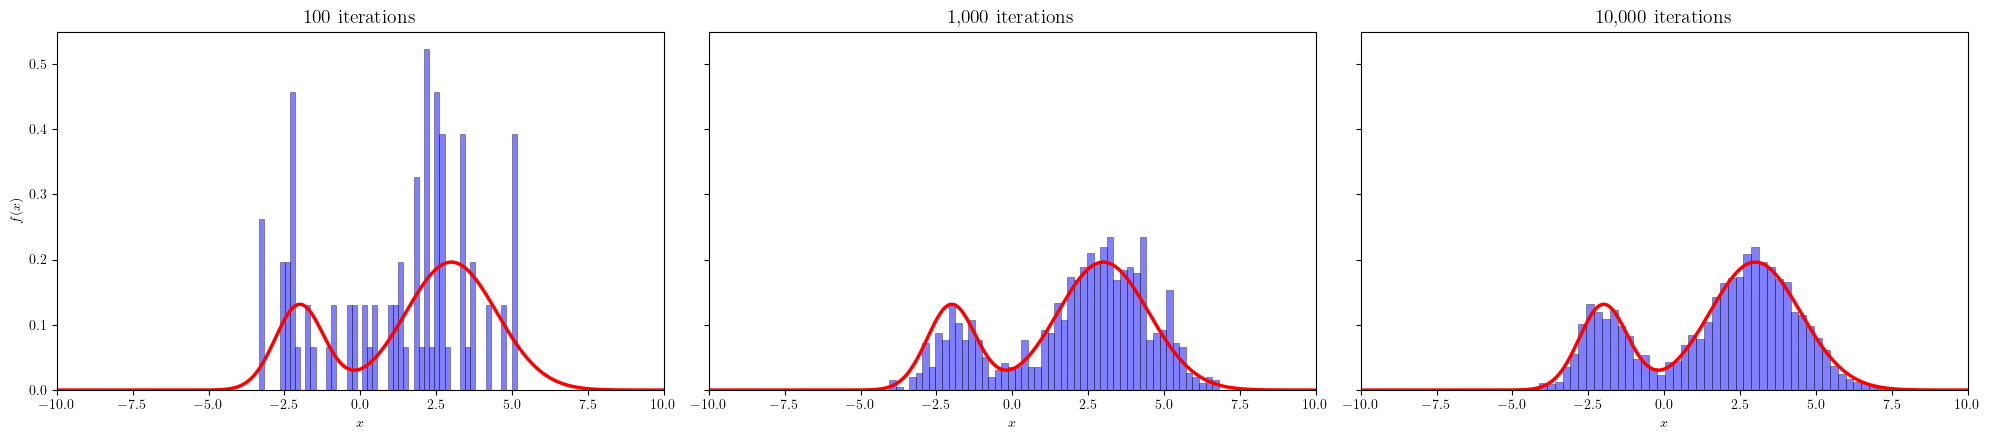

In [ ]:
def target_pdf(x):
    return 0.4 * np.exp(-0.5 * ((x + 2) / 0.8)**2) + 0.6 * np.exp(-0.5 * ((x - 3) / 1.5)**2)

x_plot = np.linspace(-10, 10, 1000)
pdf_plot = target_pdf(x_plot)
true_pdf = pdf_plot / (np.trapz(pdf_plot, x_plot))

# Metropolis-Hastings sampler
def run_mcmc(n_iterations, initial_state, proposal_std):
    samples = np.zeros(n_iterations)
    current_state = initial_state
    
    for i in range(n_iterations):
        proposed_state = np.random.normal(current_state, proposal_std)
        
        f_current = target_pdf(current_state)
        f_proposed = target_pdf(proposed_state)
        
        acceptance_prob = min(1, f_proposed / f_current)
        
        if np.random.rand() < acceptance_prob:
            current_state = proposed_state
            
        samples[i] = current_state
        
    return samples

iterations = [100, 1000, 10000]
fig, axes = plt.subplots(1, 3, figsize=(20, 4.5), sharey=True)

for ax, n_iter in zip(axes, iterations):
    samples = run_mcmc(n_iter, 0.0, 2.5)
    
    burn_in = int(n_iter * 0.1)
    final_samples = samples[burn_in:]
    
    ax.hist(final_samples, bins=50, density=True, color='blue', alpha=0.5, ec='black', lw=0.5, label=f'{n_iter} iterations')
    ax.plot(x_plot, true_pdf, 'r-', lw=2.5, label='Target distribution')
    ax.set_title(f'{n_iter:,} iterations', fontsize=14)
    ax.set_xlabel('$x$')
    ax.set_xlim(-10, 10)

axes[0].set_ylabel('$f(x)$')
# fig.suptitle('MCMC in one dimension', fontsize=18, y=1.05)
plt.tight_layout()

plt.savefig('../../../figs/monte_carlo/mcmc_convergence.pdf', bbox_inches='tight')
plt.show()

/var/folders/g9/q8qv40895cv4llyvvlj1b_380000gn/T/ipykernel_9623/371108614.py:8: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  true_pdf = pdf_plot / (np.trapz(pdf_plot, x_plot))


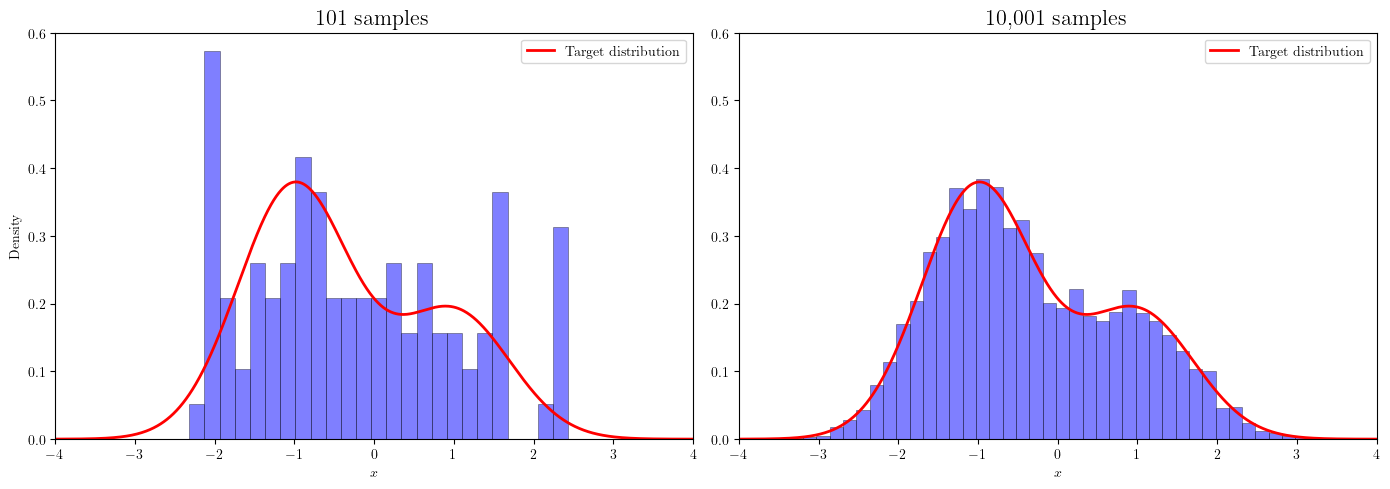

In [ ]:
def target_pdf(x):
    return np.exp(-(x - 1)**2) + 2 * np.exp(-(x + 1)**2)

x_plot = np.linspace(-4, 4, 1000)
pdf_plot = target_pdf(x_plot)
true_pdf = pdf_plot / (np.trapz(pdf_plot, x_plot))

def run_mcmc(n_iterations, initial_state, proposal_std):
    samples = np.zeros(n_iterations)
    current_state = initial_state
    
    for i in range(n_iterations):
        proposed_state = np.random.normal(current_state, proposal_std)
        f_current = target_pdf(current_state)
        f_proposed = target_pdf(proposed_state)
        acceptance_prob = min(1, f_proposed / f_current)
        
        if np.random.rand() < acceptance_prob:
            current_state = proposed_state
            
        samples[i] = current_state
        
    return samples

samples_101 = run_mcmc(101, 0.0, 1.0)
samples_10001 = run_mcmc(10001, 0.0, 1.0)
burn_in_10001 = int(10001 * 0.1)
final_samples_10001 = samples_10001[burn_in_10001:]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.hist(samples_101, bins=25, density=True, color='blue', alpha=0.5, ec='black', lw=0.5)
ax1.plot(x_plot, true_pdf, 'r-', lw=2, label='Target distribution')
ax1.set_title('101 samples', fontsize=16)
ax1.set_xlabel('$x$')
ax1.set_ylabel('Density')
ax1.set_xlim(-4, 4)
ax1.set_ylim(0, 0.6)
ax1.legend()

ax2.hist(final_samples_10001, bins=40, density=True, color='blue', alpha=0.5, ec='black', lw=0.5)
ax2.plot(x_plot, true_pdf, 'r-', lw=2, label='Target distribution')
ax2.set_title('10,001 samples', fontsize=16)
ax2.set_xlabel('$x$')
ax2.set_xlim(-4, 4)
ax2.set_ylim(0, 0.6)
ax2.legend()

# fig.suptitle(r'Metropolis-Hastings: $\pi(x) \propto \exp(-(x-1)^2) + 2\exp(-(x+1)^2)$', fontsize=16, y=1.03)
plt.tight_layout()

plt.savefig('../../../figs/monte_carlo/mcmc_example_1.pdf', bbox_inches='tight')
plt.show()

/var/folders/g9/q8qv40895cv4llyvvlj1b_380000gn/T/ipykernel_9623/3958819842.py:57: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  true_pdf = pdf_plot / (np.trapz(pdf_plot, x_plot))


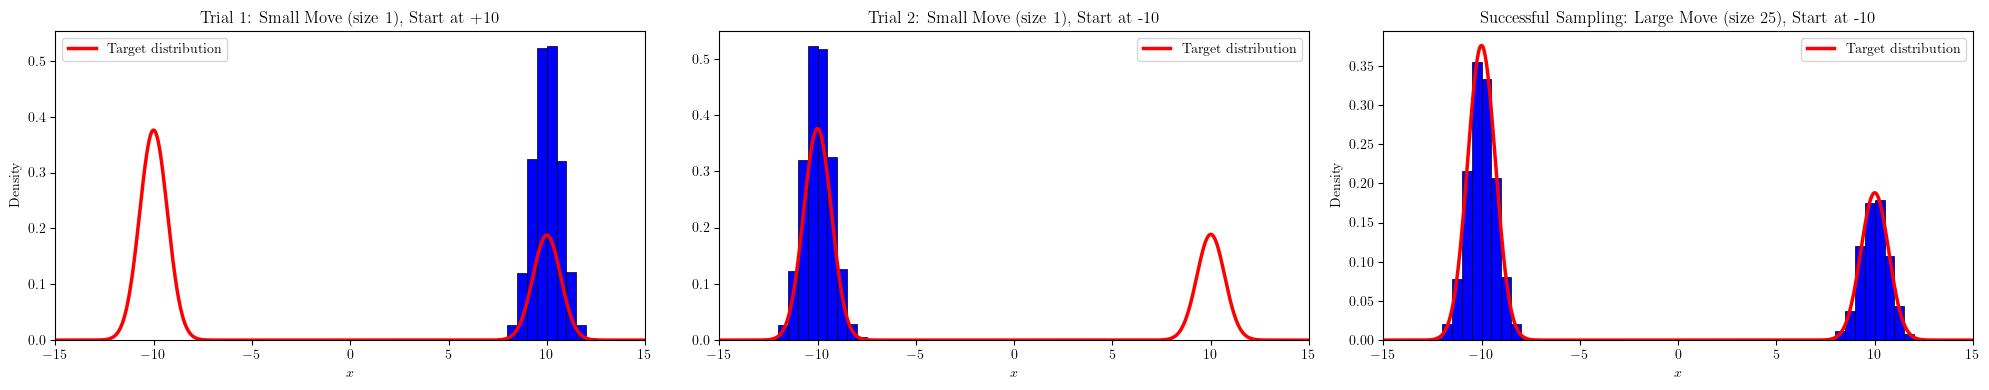

In [ ]:
def target_pdf(x):
    return np.exp(-(x - 10)**2) + 2 * np.exp(-(x + 10)**2)

def run_mcmc_uniform(n_iterations, initial_state, proposal_width):
    samples = np.zeros(n_iterations)
    current_state = initial_state
    
    for i in range(n_iterations):
        proposed_state = current_state + np.random.uniform(-proposal_width, proposal_width)
        
        f_current = target_pdf(current_state)
        f_proposed = target_pdf(proposed_state)
        acceptance_prob = min(1, f_proposed / f_current)
        
        if np.random.rand() < acceptance_prob:
            current_state = proposed_state
            
        samples[i] = current_state
        
    return samples

n_samples = 50000
burn_in = int(n_samples * 0.1)

samples_t1 = run_mcmc_uniform(n_samples, 10.0, 1.0)
final_samples_t1 = samples_t1[burn_in:]

samples_t2 = run_mcmc_uniform(n_samples, -10.0, 1.0)
final_samples_t2 = samples_t2[burn_in:]

samples_t3 = run_mcmc_uniform(n_samples, -10.0, 25.0)
final_samples_t3 = samples_t3[burn_in:]

fig = plt.figure(figsize=(20, 4))
gs = fig.add_gridspec(1, 3)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

bin_range = (-15, 15)
bins = 60
common_kwargs = {'bins': bins, 'range': bin_range, 'density': True, 'color': 'blue', 'ec': 'black', 'lw': 0.5}

x_plot = np.linspace(-15, 15, 1000)
pdf_plot = target_pdf(x_plot)
true_pdf = pdf_plot / (np.trapz(pdf_plot, x_plot))

ax1.hist(final_samples_t1, **common_kwargs)
ax1.plot(x_plot, true_pdf, 'r-', lw=2.5, label='Target distribution')
ax1.set_title('Trial 1: Small Move (size 1), Start at +10')
ax1.set_xlim(bin_range)
ax1.set_xlabel('$x$')
ax1.set_ylabel('Density')
ax1.legend()

ax2.hist(final_samples_t2, **common_kwargs)
ax2.plot(x_plot, true_pdf, 'r-', lw=2.5, label='Target distribution')
ax2.set_title('Trial 2: Small Move (size 1), Start at -10')
ax2.set_xlim(bin_range)
ax2.set_xlabel('$x$')
ax2.legend()

ax3.hist(final_samples_t3, **common_kwargs)
ax3.plot(x_plot, true_pdf, 'r-', lw=2.5, label='Target distribution')
ax3.set_title('Successful Sampling: Large Move (size 25), Start at -10')
ax3.set_xlim(bin_range)
ax3.set_xlabel('$x$')
ax3.set_ylabel('Density')
ax3.legend()

# fig.suptitle(r'Target: $\pi(x) \propto \exp(-(x-10)^2) + 2\exp(-(x+10)^2)$', fontsize=16, y=1.03)
plt.tight_layout()

plt.savefig('../../../figs/monte_carlo/mcmc_pitfall.pdf', bbox_inches='tight', transparent=True)
plt.show()

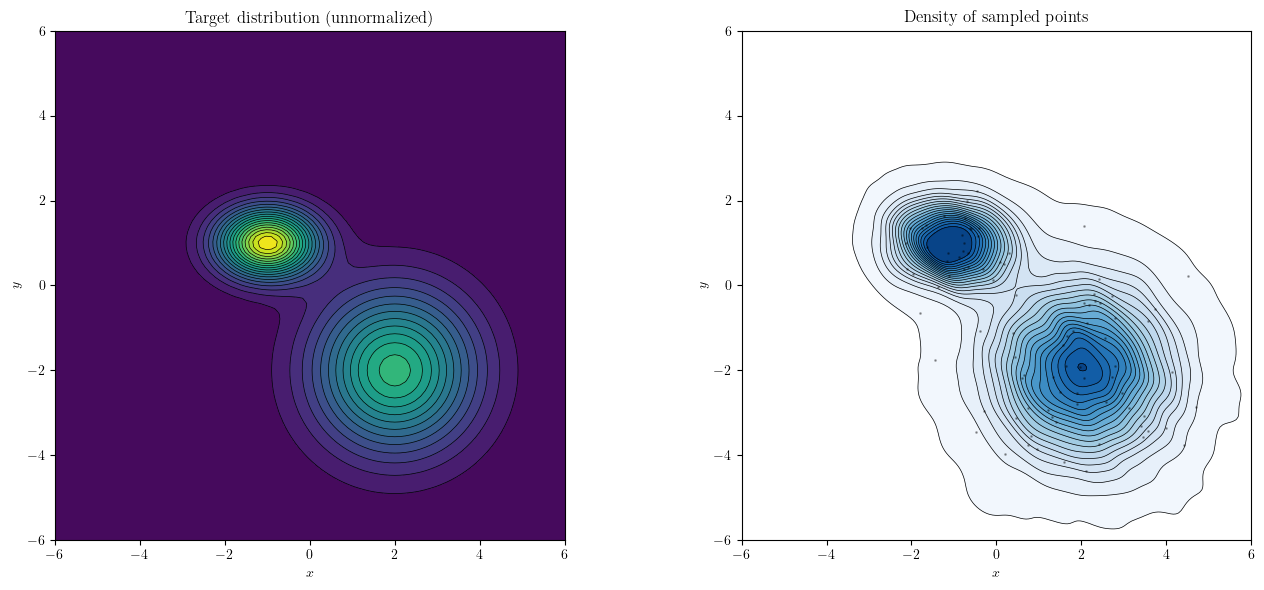

In [45]:
def unnormalized_pdf(x, y):
    """
    Defines a 2D bimodal distribution.
    x, y can be scalars or NumPy arrays.
    """
    p1 = 1.5 * np.exp(-0.8 * ((x + 1)**2 + 2 * (y - 1)**2))    
    p2 = 1.0 * np.exp(-0.3 * ((x - 2)**2 + (y + 2)**2))
    
    return p1 + p2

def run_mcmc_2d(n_iterations, initial_state, proposal_std):
    """
    Runs a 2D MCMC sampler.
    
    :param n_iterations: Total number of steps to run.
    :param initial_state: A list or tuple [x, y] for the start position.
    :param proposal_std: Standard deviation for the (symmetric) Gaussian proposal.
    :return: A (n_iterations, 2) NumPy array of samples.
    """
    samples = np.zeros((n_iterations, 2))
    current_state = np.array(initial_state)
    
    for i in range(n_iterations):
        proposed_state = current_state + np.random.normal(0, proposal_std, size=2)
        
        f_current = unnormalized_pdf(current_state[0], current_state[1])
        f_proposed = unnormalized_pdf(proposed_state[0], proposed_state[1])        
        acceptance_prob = min(1, f_proposed / f_current)
        
        if np.random.rand() < acceptance_prob:
            current_state = proposed_state
            
        samples[i] = current_state
        
    return samples

# MCMC parameters
N_ITERATIONS = 50000
INITIAL_STATE = [-4.0, -4.0]
PROPOSAL_STD = 1.5
BURN_IN = 5000

samples_chain = run_mcmc_2d(N_ITERATIONS, INITIAL_STATE, PROPOSAL_STD)

final_samples = samples_chain[BURN_IN:]

x_grid = np.linspace(-6, 6, 100)
y_grid = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x_grid, y_grid)
Z = unnormalized_pdf(X, Y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
# fig.suptitle('MCMC in two dimensions', fontsize=18, y=1.02)

ax1.set_title('Target distribution (unnormalized)')
cf = ax1.contourf(X, Y, Z, levels=20, cmap='viridis')
ax1.contour(X, Y, Z, levels=cf.levels, colors='black', linewidths=0.5)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_aspect('equal', 'box')
ax1.set_xlim(-6, 6)
ax1.set_ylim(-6, 6)

ax2.set_title('Density of sampled points')
sns.kdeplot(
    x=final_samples[:, 0], 
    y=final_samples[:, 1], 
    ax=ax2,
    fill=True,
    cmap='Blues',
    levels=20,
    thresh=0.01
)
sns.kdeplot(
    x=final_samples[:, 0], 
    y=final_samples[:, 1], 
    ax=ax2,
    colors='black',
    levels=20,
    linewidths=0.5,
    thresh=0.01
)
ax2.scatter(final_samples[::500, 0], final_samples[::500, 1], s=1, c='black', alpha=0.3)

ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_aspect('equal', 'box')
ax2.set_xlim(-6, 6)
ax2.set_ylim(-6, 6)

plt.tight_layout()
plt.savefig('../../../figs/monte_carlo/mcmc_2d.pdf', bbox_inches='tight')
plt.show()

/var/folders/g9/q8qv40895cv4llyvvlj1b_380000gn/T/ipykernel_9623/1813764720.py:17: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Z_T = np.trapz(unnormalized, x)


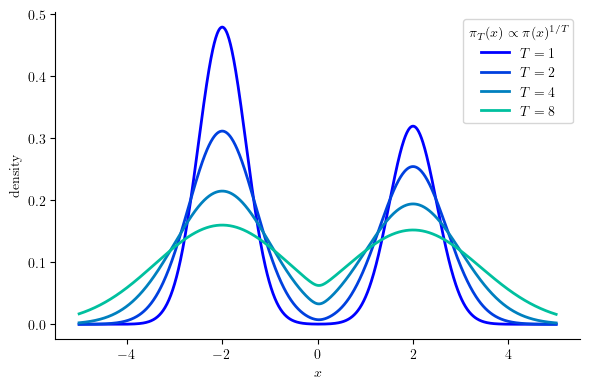

In [ ]:
def mixture_pdf(x):
    """Target distribution π(x): a bimodal Gaussian mixture."""
    w1, mu1, sigma1 = 0.6, -2.0, 0.5
    w2, mu2, sigma2 = 0.4,  2.0, 0.5

    gauss1 = w1 * (1/(np.sqrt(2*np.pi)*sigma1)) * np.exp(-0.5*((x-mu1)/sigma1)**2)
    gauss2 = w2 * (1/(np.sqrt(2*np.pi)*sigma2)) * np.exp(-0.5*((x-mu2)/sigma2)**2)
    return gauss1 + gauss2  # mixture density

def annealed_pdf(x, T):
    """
    Annealed distribution π_T(x) ∝ π(x)^(1/T).
    We renormalize so it integrates to 1 for plotting.
    """
    unnormalized = mixture_pdf(x) ** (1.0 / T)
    # numerical normalization constant Z_T = ∫ π(x)^(1/T) dx
    Z_T = np.trapz(unnormalized, x)
    return unnormalized / Z_T

x = np.linspace(-5, 5, 1000)

temperatures = [1.0, 2.0, 4.0, 8.0]

densities = {T: annealed_pdf(x, T) for T in temperatures}

fig, ax = plt.subplots(figsize=(6, 4))

cmap = plt.get_cmap('winter')

for i, T in enumerate(temperatures):
    ax.plot(
        x,
        densities[T],
        label=fr"$T={T:.0f}$",
        linewidth=2,
        color=cmap(i / len(temperatures))
    )

ax.set_xlabel(r"$x$")
ax.set_ylabel("density")
# ax.set_title("Simulated annealing flattens the distribution")
ax.legend(title=r"$\pi_T(x) \propto \pi(x)^{1/T}$")
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()

plt.savefig("../../../figs/monte_carlo/simulated_annealing_flattening.pdf")
plt.show()
